### Moving Average
- https://www.investopedia.com/terms/m/movingaverage.asp

$MAn_i = \frac{C_{i-(n-1)} + C_{i-(n-2)} + \cdots + C_{i-1} + C_i}{n}$
- $MAn_i$: Moving average of period $n$ at trading day $i$.
- $n$: Period.
- $C_i$: Closing price at trading day $i$.

$MA10_{i} = \frac{C_{i-9} + C_{i-8} + \cdots + C_{i-1} + C_i}{n}$

**Signal**
- Close price > MAn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
fb = pd.read_csv("ticker-fb.csv", index_col=0, parse_dates=True)

In [3]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999


In [8]:
fb['MA10'] = fb['Close'].rolling(10).mean()

In [10]:
fb.head(15)

,High,Low,Open,Close,Volume,Adj Close,MA10
Date,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,NaN
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,NaN
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,NaN
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,NaN
2018-01-09,188.800003,187.100006,188.699997,187.869995,12393100,187.869995,NaN
2018-01-10,187.889999,185.630005,186.940002,187.839996,10529900,187.839996,NaN
2018-01-11,188.399994,187.380005,188.399994,187.770004,9588600,187.770004,NaN
2018-01-12,181.479996,177.399994,178.059998,179.369995,77551300,179.369995,NaN


<IPython.core.display.Javascript object>


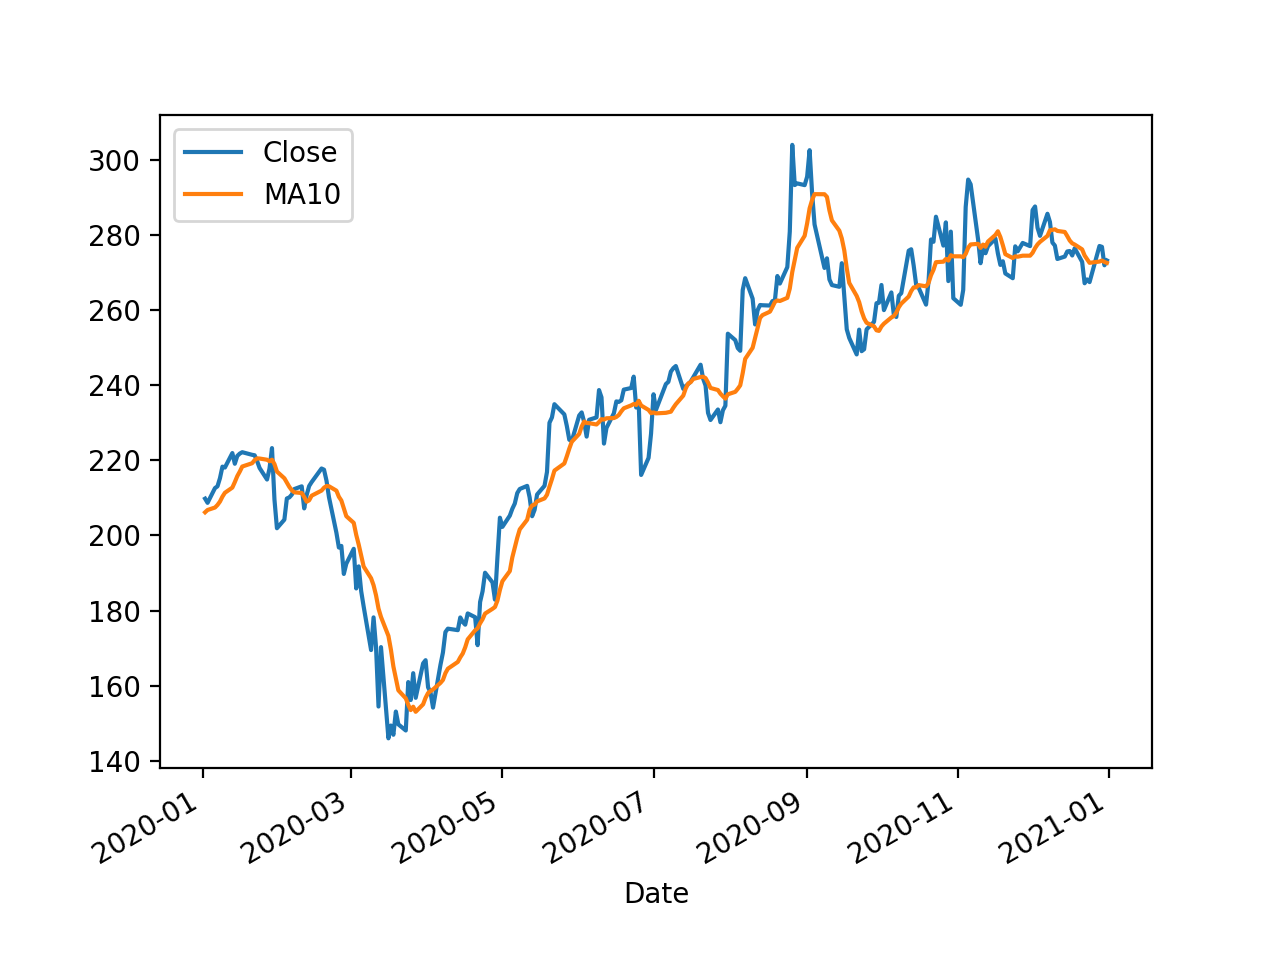

<AxesSubplot:xlabel='Date'>

In [12]:
fig, ax = plt.subplots()
fb.loc['2020-01-01':][['Close', 'MA10']].plot(ax=ax)

In [13]:
fb['MA50'] = fb['Close'].rolling(50).mean()

<IPython.core.display.Javascript object>


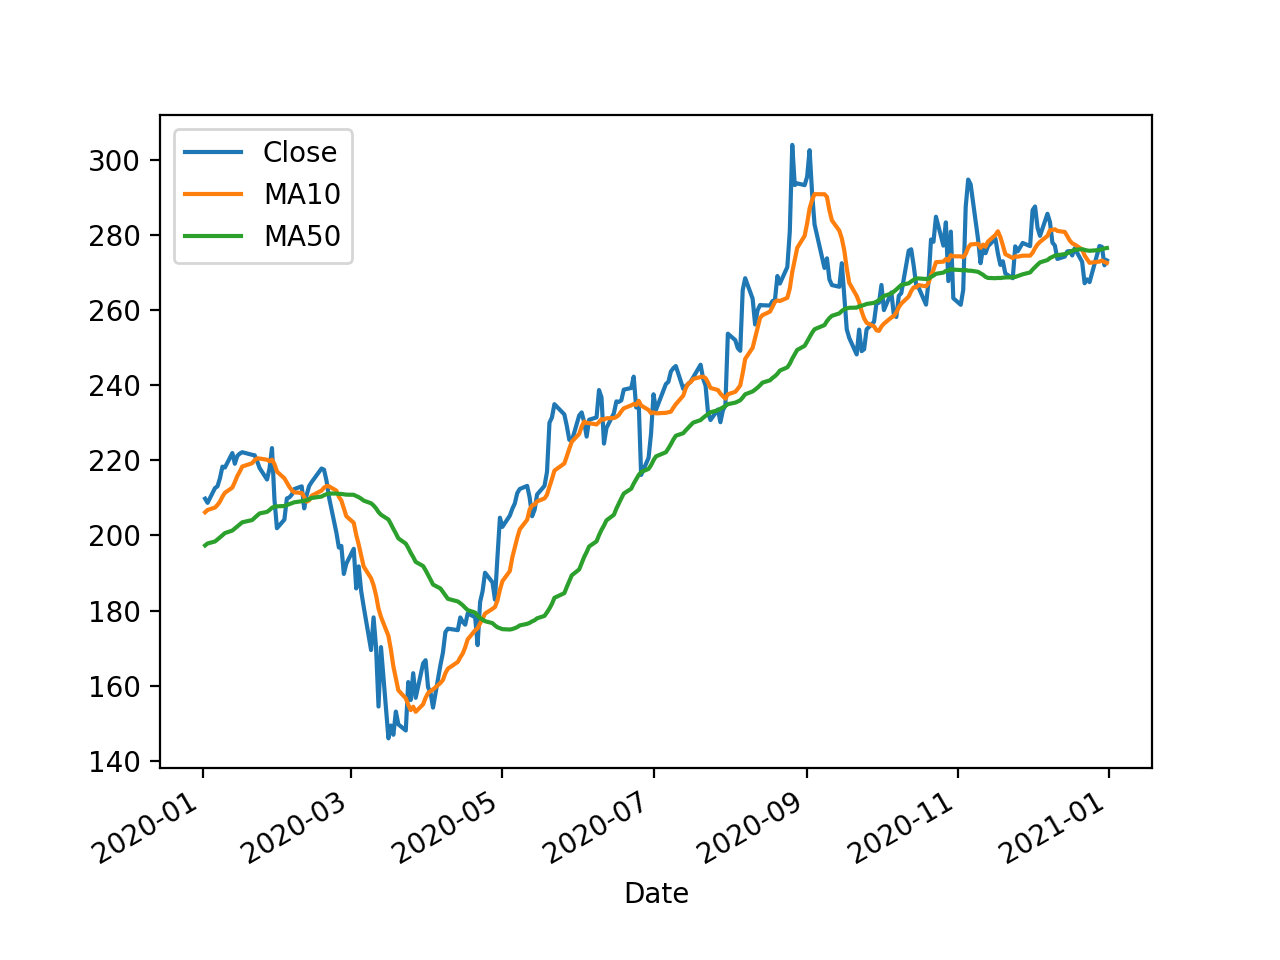

<AxesSubplot:xlabel='Date'>

In [14]:
fig, ax = plt.subplots()
fb.loc['2020-01-01':][['Close', 'MA10', 'MA50']].plot(ax=ax)

In [15]:
fb.tail()

,High,Low,Open,Close,Volume,Adj Close,MA10,MA50
Date,,,,,,,,
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994,272.522998,275.725198
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000,272.867999,275.930798
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999,273.126999,276.147798
2020-12-30,278.079987,271.709991,277.950012,271.869995,11803800,271.869995,272.759000,276.357198
2020-12-31,277.089996,269.809998,272.000000,273.160004,12892900,273.160004,272.507999,276.469199


In [17]:
fb['Signal'] = fb['Close'] > fb['MA10']

In [18]:
fb.tail()

,High,Low,Open,Close,Volume,Adj Close,MA10,MA50,Signal
Date,,,,,,,,,
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994,272.522998,275.725198,False
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000,272.867999,275.930798,True
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999,273.126999,276.147798,True
2020-12-30,278.079987,271.709991,277.950012,271.869995,11803800,271.869995,272.759000,276.357198,False
2020-12-31,277.089996,269.809998,272.000000,273.160004,12892900,273.160004,272.507999,276.469199,True
